<a href="https://colab.research.google.com/github/Abhinav4518/Abhinav4518/blob/main/Linear_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np

In [68]:
# Linear Regression
import numpy as np # It's good practice to have this import at the top

class Linear_Regression():

    def __init__(self,learning_rate,no_of_iterations):
        #learning parameter and no of iterations are hyperparameter
        self.learning_rate=learning_rate
        self.no_of_iterations=no_of_iterations

    def fit(self,X,Y):
        #number of training examples and number of parameters
        self.m,self.n=X.shape
        #initiating weight and bias
        self.w=np.zeros(self.n) #features can be more so using array
        self.b=0
        self.X=X
        self.Y=Y

        #implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        # FIX: The method call was changed from self.prediction() to self.predict()
        Y_prediction=self.predict(self.X)

        #calculate the gradients
        dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
        db=-2*np.sum(self.Y-Y_prediction)/self.m

        #updating the weights
        self.w=self.w-self.learning_rate*dw
        self.b=self.b-self.learning_rate*db

    def predict(self,X):
        return X.dot(self.w)+self.b

Using Linear Regression for Model Evaluation

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [70]:
#Data PreProcessing
salary_data=pd.read_csv('/content/salary_data.csv')

In [71]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [72]:
#checking for missing value
salary_data.isnull().sum()
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [73]:
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

In [74]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [75]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [76]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [77]:
#Training the linear regression model
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [78]:
model.fit(X_train,Y_train)

In [79]:
#printing the parameter values(weightd and bias)
print('weight= ',model.w[0])
print('bias= ',model.b)

weight=  9514.400999035135
bias=  23697.406507136307


In [81]:
#salary=9514(experience)+23697
#Predicting the salary value
test_data_prediction=model.predict(X_test);
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


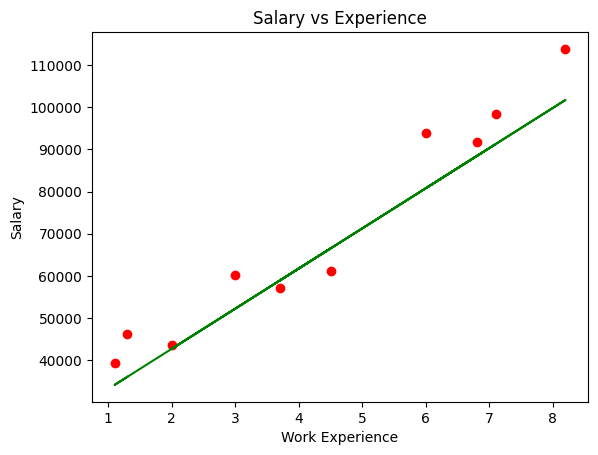

In [84]:
#Visualising the predicted data vs real data
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='green')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()